In [66]:
from utils import *
import matplotlib.pyplot as plt

In [67]:
import numpy as np
%matplotlib inline

### The function below is used to allocate the nearest centroid to all the data points

.

In [68]:
def closest_centroids(X, centroids ):
    
    K= centroids.shape[0]
    
    m= X.shape[0]
    
    
    idx= np.zeros(X.shape[0], dtype= int ) # This array stores closest centroid index for all the data points
    
    # Below we create a distance array to store distance of each point from all the centroid
    
    for i in range(m):
        distances= []   # after every iteration, we reset the distance array to store new info for the next data point
        for j in range(K):
            
            distances.append(np.linalg.norm( X[i]-centroids[j]))
        
        
        idx[i]= np.argmin(distances)   # index of the centroid with shortest distance
         
    return idx

### The function below recomputes the centroid using the the mean of the all the data points

.

In [69]:
def recompute_centroids(idx, X,K):
  
    
    m, n= X.shape
    centroids= np.zeros((K,n))
    
    for i in range(K):     
        
        points= X[idx==i]   # X[idx=i] return all the values of X for which the the corresponding idx value equal i 
     
        centroids[i]=np.mean(points, axis=0)    

    
    return centroids
    
    

### This function is to run the k means algo. a several times to find the best centers

.

In [70]:
def Kmeans(X, intial_centroids, max_iters):
    
    K=initial_centroids.shape[0]   # function to initialize centroids is given below
    centroids=initial_centroids
    
    for i in range(max_iters):
        print('K means iteration:%d/%d '%(i+1,max_iters))
    
        idx= closest_centroids(X, centroids)
        centroids= recompute_centroids(idx, X,K )
        
        
    return idx, centroids

.

The function given below is to randomly initialize the centroids. These centroids are then adjusted using the k means algo

In [71]:
def random_initialization_of_centroids(X,K):
    temp= np.random.permutation(X.shape[0])
    centroids= X[temp[:K]]
    
    
    return centroids
    

.

Reading the image

.

In [72]:
original= plt.imread('Original_bird.jpg')

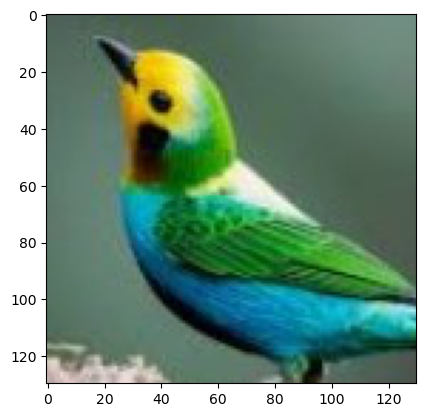

In [73]:
plt.imshow(original)     

In [74]:
original.shape

(130, 130, 3)

.

In [75]:
original=original/255    # Normalizing image    

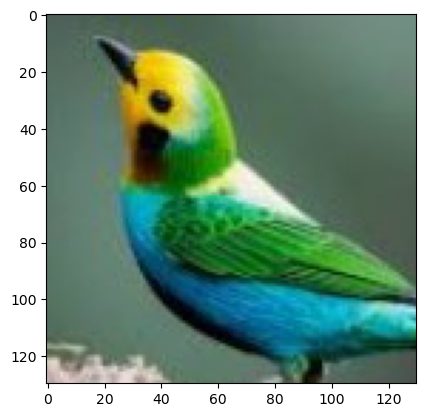

In [76]:
plt.imshow(original)

.


Now reshaping the image into a column matrix as per algo's requirement.

In [77]:
reshaped_img= np.reshape(original, (original.shape[0]*original.shape[1],3))

Initializing centroids

In [78]:
initial_centroids= random_initialization_of_centroids(reshaped_img, 16) # In the second argument, we specify the number of centroids
print (initial_centroids)

[[0.35686275 0.48235294 0.4       ]
 [0.52941176 0.84313725 0.87843137]
 [0.18823529 0.49411765 0.2       ]
 [0.05098039 0.09019608 0.05490196]
 [0.08627451 0.03921569 0.        ]
 [0.29411765 0.38039216 0.32941176]
 [0.35686275 0.4627451  0.39607843]
 [0.         0.49411765 0.09019608]
 [0.43921569 0.74901961 0.38823529]
 [0.03529412 0.2745098  0.34901961]
 [0.40784314 0.4627451  0.40392157]
 [0.36862745 0.4745098  0.40784314]
 [0.3254902  0.42352941 0.4       ]
 [0.03921569 0.30980392 0.43137255]
 [0.31372549 0.40392157 0.33333333]
 [0.36078431 0.42352941 0.38431373]]


Running the k Means algo to find the optimal centroids 

In [79]:
idx, centroids= Kmeans(reshaped_img,initial_centroids,5 ) # the 3rd argument is the number of iterations of k means algo to find the optimal centroids. 5 is a good one

K means iteration:1/5 
K means iteration:2/5 
K means iteration:3/5 
K means iteration:4/5 
K means iteration:5/5 


Rerunning the closest centroid on the final centroids to get the final idx matrix

In [81]:
'''the first line of code is simply assigning each data point, the value of its respective centroid.
 If you are unable to grasp it, you can specifically search the meaning 
 of this type of indexing'''

transformed_img= centroids[idx, :]  
transformed= np.reshape(transformed_img, original.shape)# reshaping to make a matrix again to display
transformed.shape


(130, 130, 3)

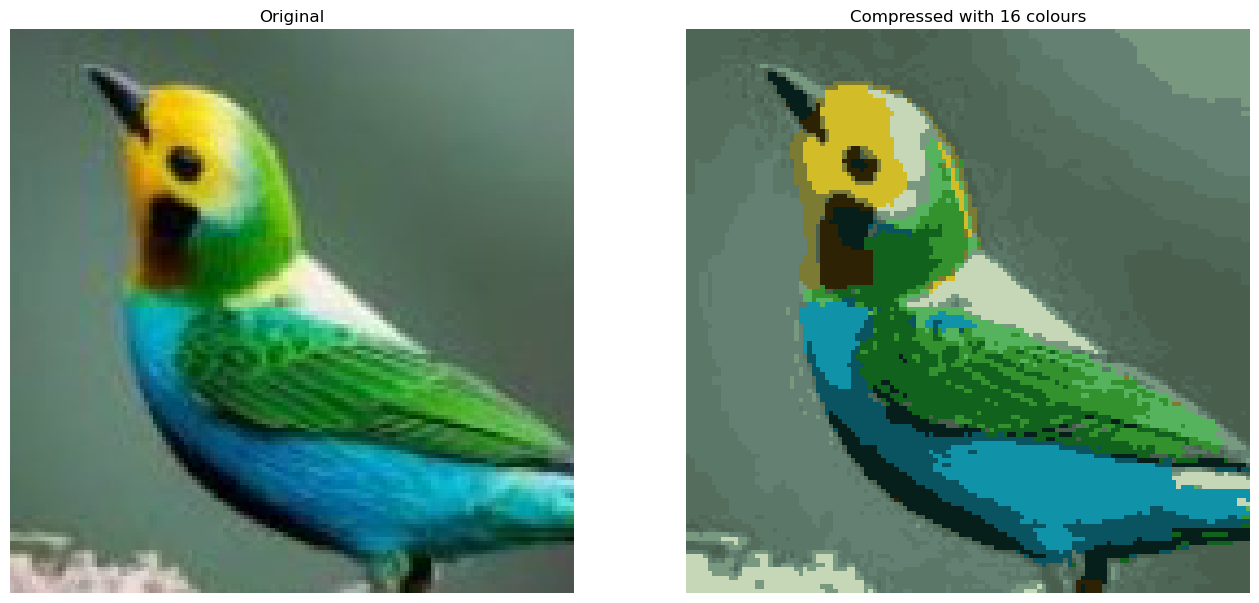

In [82]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original)
ax[0].set_title('Original')
ax[0].set_axis_off()
K=centroids.shape[0]

# Display compressed image
ax[1].imshow(transformed)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()